In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data=pd.read_csv("/content/drive/MyDrive/EDA/ds_salaries (1).csv")
print(data)

      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence

In [7]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [11]:
data['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [12]:
data['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64



*   EN-> Entry level

*   SE->Senior Level
*   MI-> Mid level


*   EX-> Executive  level



In [14]:
data['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64



*   FT->Full time

*   PT->Part time 

*   CT->Contract

*   FL->Freelance








In [15]:
data.isnull().sum() 

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

*No null values in the given dataset*







In [21]:
encode=data
encode['experience_level']=encode['experience_level'].astype('category') 
encode['experience_level'] = encode['experience_level'].cat.codes 
encode['employment_type']=encode['employment_type'].astype('category') 
encode['employment_type'] = encode['employment_type'].cat.codes 
encode['salary_currency']=encode['salary_currency'].astype('category') 
encode['salary_currency'] = encode['salary_currency'].cat.codes 
encode['employee_residence']=encode['employee_residence'].astype('category') 
encode['employee_residence'] = encode['employee_residence'].cat.codes 
encode['company_location']=encode['company_location'].astype('category') 
encode['company_location'] = encode['company_location'].cat.codes 
encode['company_size']=encode['company_size'].astype('category') 
encode['company_size'] = encode['company_size'].cat.codes 
encode

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,Principal Data Scientist,80000,7,85847,26,100,25,0
1,2023,2,0,ML Engineer,30000,19,30000,75,100,70,2
2,2023,2,0,ML Engineer,25500,19,25500,75,100,70,2
3,2023,3,2,Data Scientist,175000,19,175000,11,100,12,1
4,2023,3,2,Data Scientist,120000,19,120000,11,100,12,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,2,Data Scientist,412000,19,412000,75,100,70,0
3751,2021,2,2,Principal Data Scientist,151000,19,151000,75,100,70,0
3752,2020,0,2,Data Scientist,105000,19,105000,75,100,70,2
3753,2020,0,0,Business Data Analyst,100000,19,100000,75,100,70,0


In [48]:
data.corr()

<ipython-input-48-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.187748,0.011127,-0.094724,0.254548,0.228290,0.243475,-0.236430,0.234661,0.138875
experience_level,0.187748,1.000000,-0.032794,-0.024884,0.225464,0.327173,0.251325,-0.054025,0.250591,0.066414
employment_type,0.011127,-0.032794,1.000000,-0.003908,-0.048446,-0.010329,-0.024582,-0.028673,-0.013963,-0.041001
salary,-0.094724,-0.024884,-0.003908,1.000000,-0.091121,-0.023676,-0.087176,0.028731,-0.072774,-0.100352
salary_currency,0.254548,0.225464,-0.048446,-0.091121,1.000000,0.430450,0.755836,-0.046644,0.764744,0.102738
salary_in_usd,0.228290,0.327173,-0.010329,-0.023676,0.430450,1.000000,0.414039,-0.064171,0.405183,-0.000372
employee_residence,0.243475,0.251325,-0.024582,-0.087176,0.755836,0.414039,1.000000,-0.083142,0.945676,0.032168
remote_ratio,-0.236430,-0.054025,-0.028673,0.028731,-0.046644,-0.064171,-0.083142,1.000000,-0.071574,-0.036928
company_location,0.234661,0.250591,-0.013963,-0.072774,0.764744,0.405183,0.945676,-0.071574,1.000000,0.041703
company_size,0.138875,0.066414,-0.041001,-0.100352,0.102738,-0.000372,0.032168,-0.036928,0.041703,1.000000


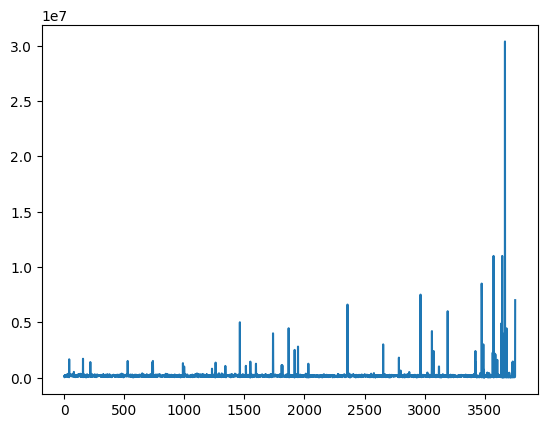

In [27]:
plt.plot(data['salary'])

<ipython-input-29-1f756df288d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

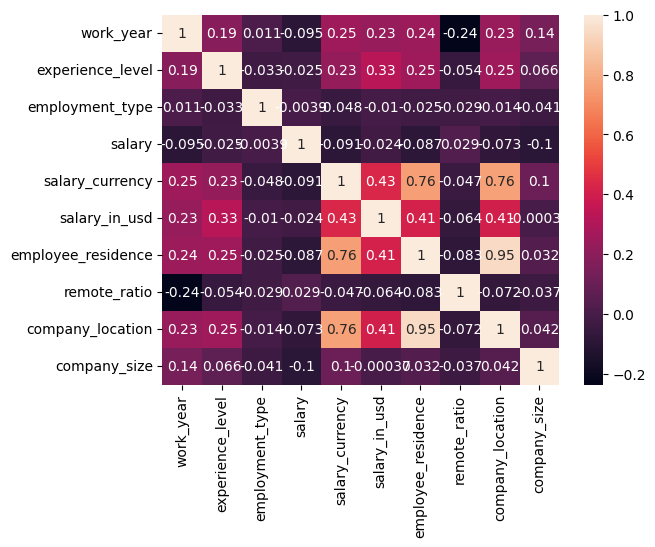

In [29]:
sns.heatmap(data.corr(), annot = True)


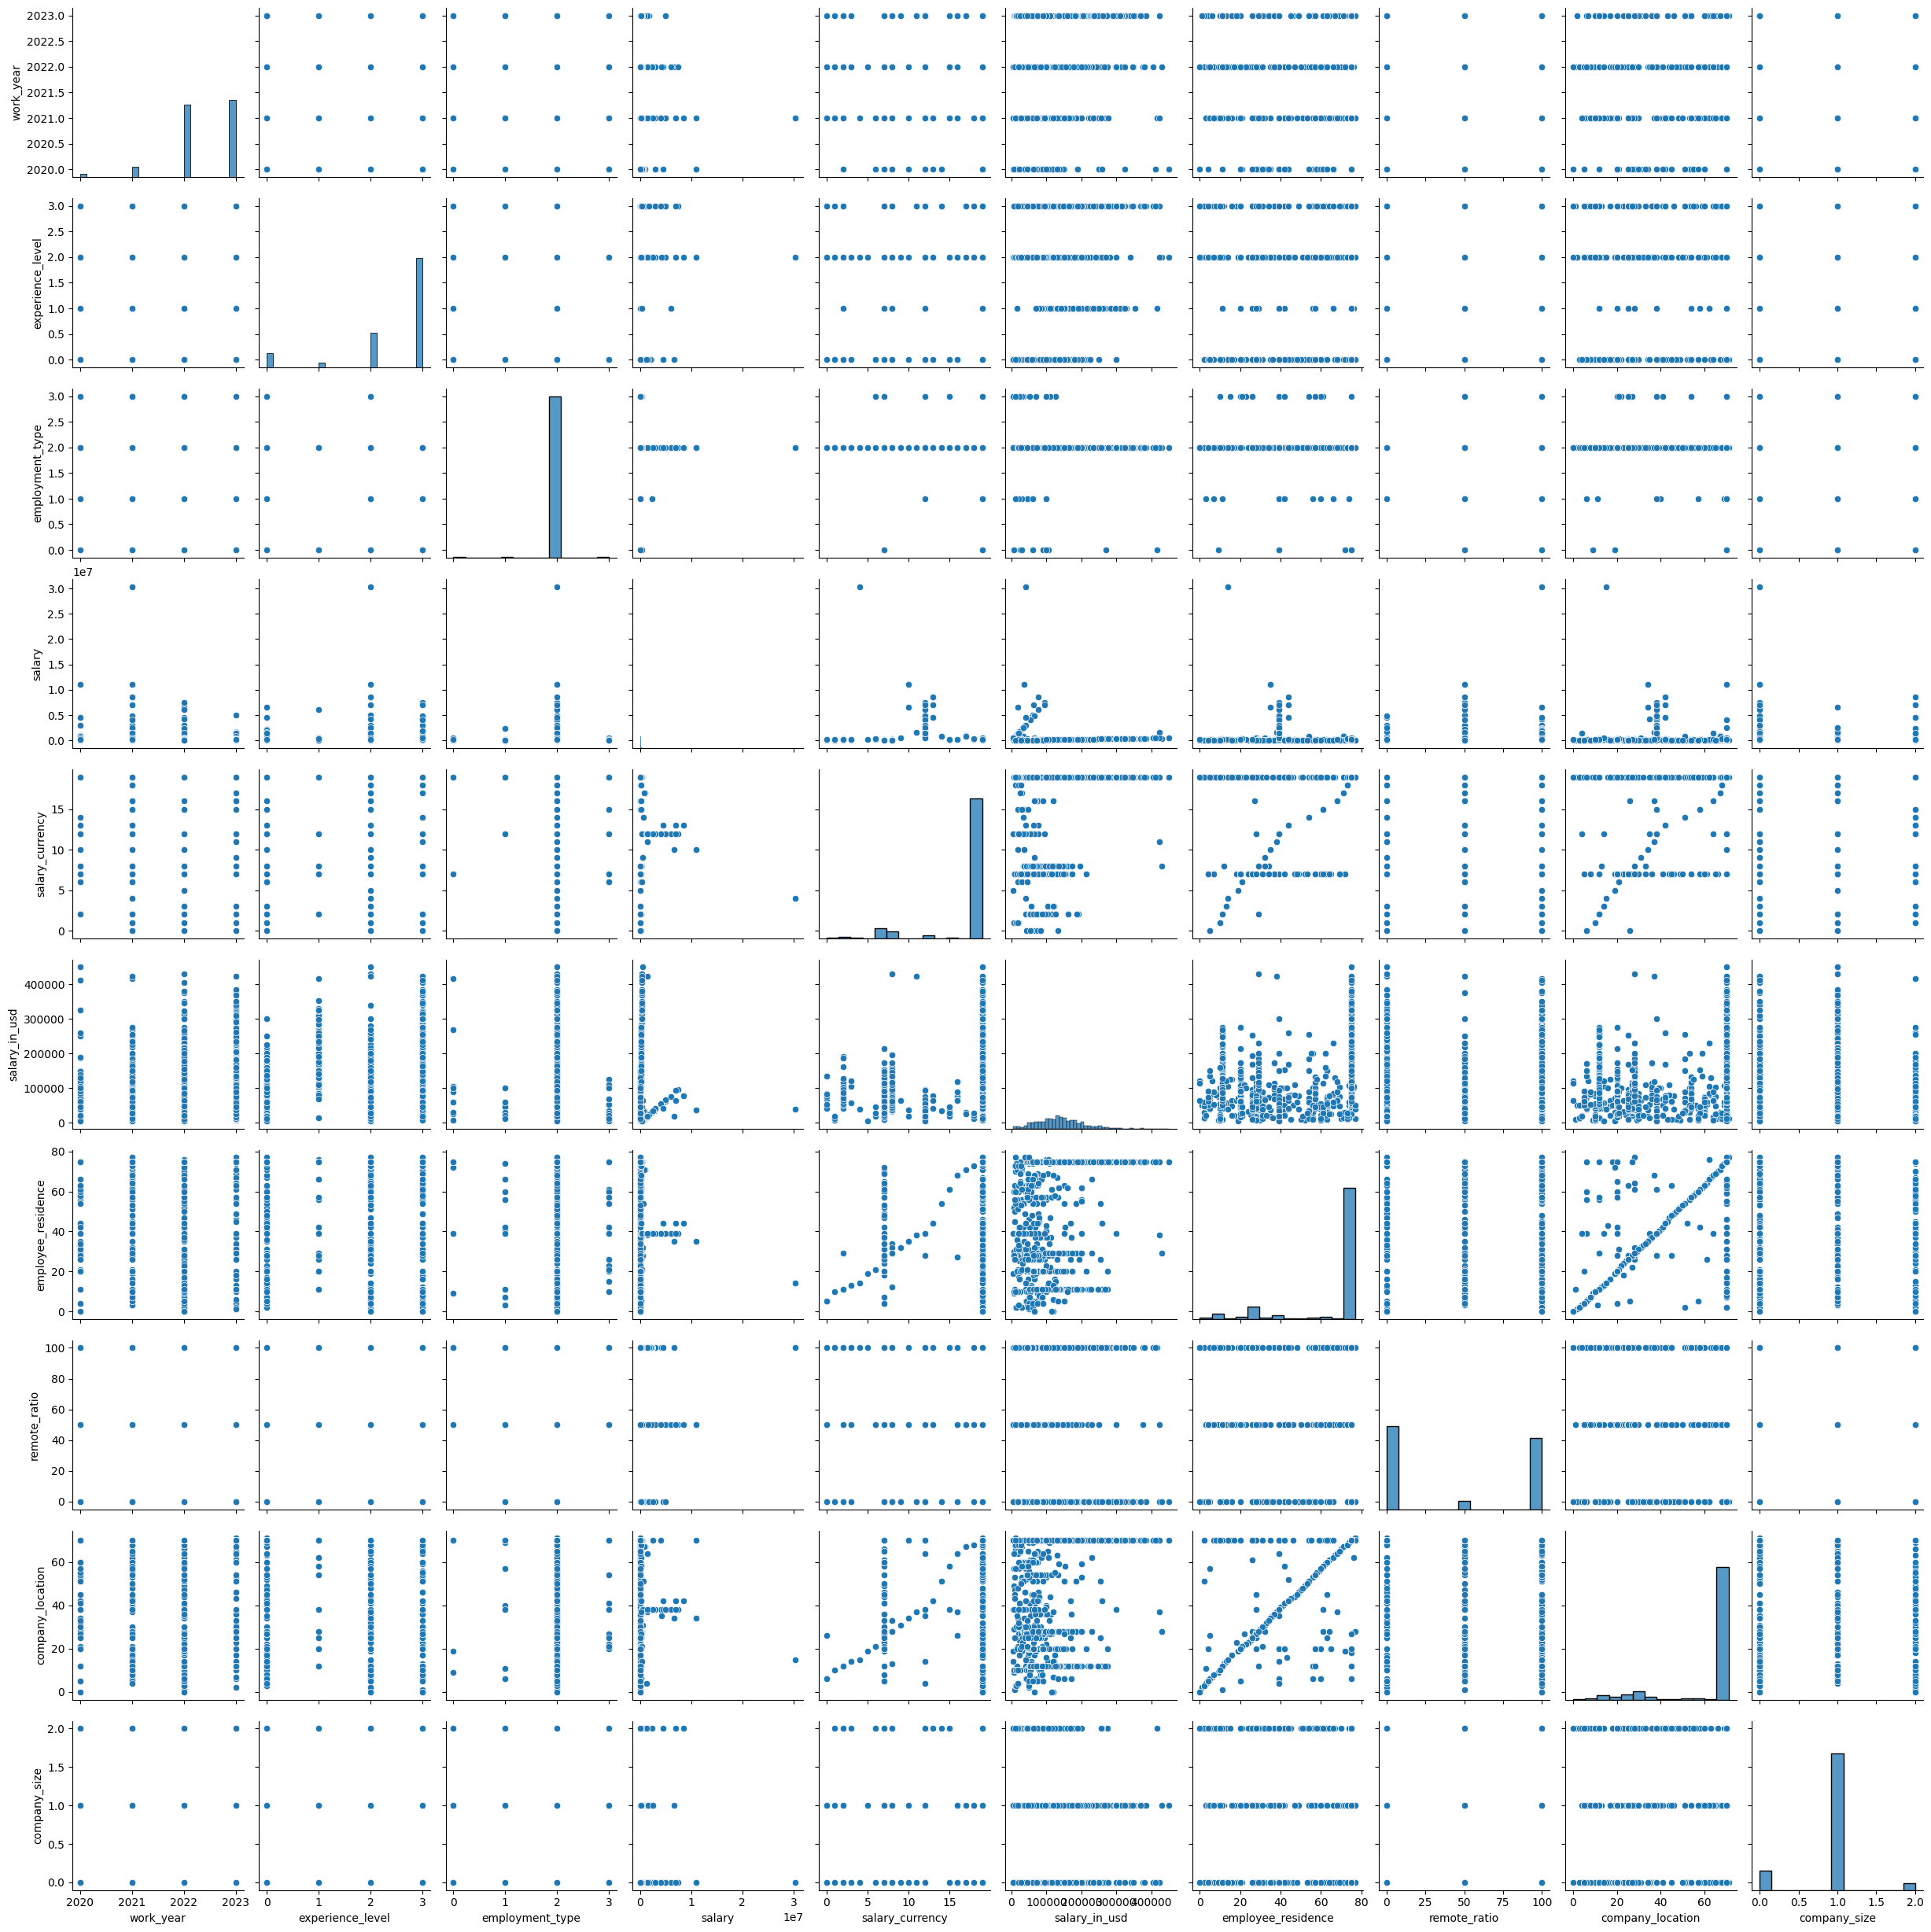

In [31]:
sns.pairplot(data)

In [35]:
np.average(data['salary'])

190695.57177097205

In [36]:
np.average(data['experience_level'])

2.469241011984021

In [55]:
X1 = data["salary_currency"]
X2 = data["remote_ratio"]
Y1 = data["salary_in_usd"]

In [56]:
x1_mean = np.mean(X1)
x2_mean = np.mean(X2)
y1_mean = np.mean(Y1)
num1=0
num2=0
den1=0
den2= 0
for i in range(len(Y1)):
  num1+=(X1[i]-x1_mean)*(Y1[i]-y1_mean)
  num2+=(X2[i]-x2_mean)*(Y1[i]-y1_mean)
  den1+=(X1[i]-x1_mean)**2
  den2+=(X2[i]-x2_mean)**2
b1=num1/den1
b2=num2/den2
b0=y1_mean-(b1*x1_mean)-(b2*x2_mean)
print('Intercept: ',b0 ,'Slope 1 : ',b1 ,'Slope 2 : ',b2 , '\n')

Intercept:  25113.239117972087 Slope 1 :  6680.830748728057 Slope 2 :  -83.276819709839 



In [57]:
y1_pred = b0 + b1*X1 + b2*X2
print("Y_pred \n",y1_pred)

Y_pred 
 0        63551.372388
1       143721.341373
2       143721.341373
3       143721.341373
4       143721.341373
            ...      
3750    143721.341373
3751    143721.341373
3752    143721.341373
3753    143721.341373
3754    101119.367117
Length: 3755, dtype: float64


In [58]:
se1 = 0
for i in range(len(Y1)):
  se1 += (Y1[i]-y1_pred[i])**2
print("Sum of squared error: ",se1)

Sum of squared error:  12137363376391.37


In [59]:
st1 = 0
for i in range(len(Y1)):
  st1 += (Y1[i]-y1_mean)**2
  r21 = 1-(se1/st1)
print("R-Square: ",r21)

R-Square:  0.18682800631075103


Text(0.5, 1.0, 'Prediction of Data scientists salary')

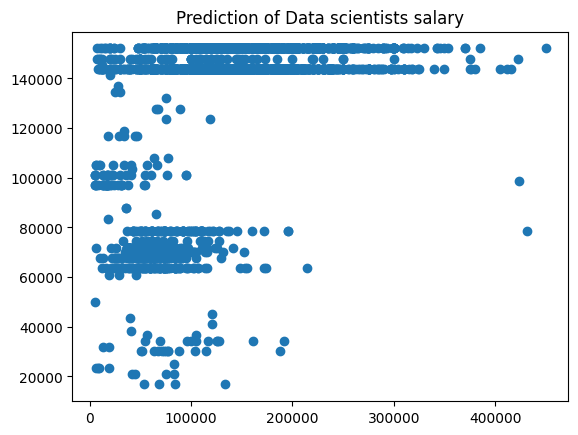

In [60]:
plt.scatter(Y1,y1_pred)
plt.title("Prediction of Data scientists salary")
